<a href="https://colab.research.google.com/github/Ru1chi/Deep_learning/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

## **Downloading the dataset from kaggle**

In [4]:
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:07<00:00, 79.0MB/s]
100% 715M/715M [00:07<00:00, 97.4MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


## **Extracting the zipped files**

In [6]:
from zipfile import ZipFile
dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("All the files are extracted")

All the files are extracted


In [7]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


## **install py7zr to extract the 7z files**

In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.9 MB/s eta 0:00:00


In [9]:
import  py7zr

archive= py7zr.SevenZipFile('/content/train.7z',mode='r')#.SevenZipFile function in py7zr to extract the 7z file
archive.extractall()    #to download the file to a specific path---> archive.extractall(path='/content/trainingData(sample)')
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf


## **To check the num of files in thr=e training dataset**

In [12]:
filenames=os.listdir('/content/train')

In [13]:
type(filenames)

list

In [14]:
len(filenames)

50000

In [15]:
print(filenames[0:5])

['13496.png', '21015.png', '32481.png', '32.png', '12291.png']


Labels Processing

In [16]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [17]:
labels_df.shape


(50000, 2)

In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df[labels_df['id']==13496]

,id,label
13495,13496,frog


## **All the images are not in order**

In [20]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [21]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [22]:
#take id column as list and pass it to the for loop

In [23]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

## **Giving all the unique values a num**

In [24]:
labels_dict = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [25]:
labels_dict

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [26]:
#now create a list using for loop
labels=[labels_dict[i] for i in labels_df['label']]#in dictoinary using the keys to identify the image


In [27]:
labels_df[0:10]

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [28]:
labels[0:5]

[6, 9, 9, 4, 1]

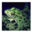

In [29]:
# diplaying the sample image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/train/13496.png")
cv2_imshow(img)

## **id in a seperate list**

In [30]:
id_list=list(labels_df['id'])

In [31]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


## **Image processing**


In [32]:
#converting images to numpy arrays
train_data_folder='/content/train/'

data=[]

#save all the images as numpy arrays in the data(list)
for id in id_list:
  image=Image.open(train_data_folder + str(id) +'.png')#for example taken the 1 value as 1 ten concate it with the folfer by converting it into string
  #this step will not convert the image to array
  image=np.array(image)
  #now add this arrays to new list as data[]
  data.append(image)



In [33]:
type(data)#data in whole is list

list

In [34]:
len(data)

50000

In [35]:
type(data[0])#sigle entity in list are array

numpy.ndarray

In [36]:
data[0].shape

(32, 32, 3)

In [37]:
print(data[0])#this arrays are for the single-single pixels based on the color

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Convert images list and labels list to numpy array (they are in the form of list) seperating the dependent and independent variables

In [38]:
x=np.array(data)
y=np.array(labels)

In [39]:
print(x.shape)#50000 images of shape 32*32 as rgb
print(y.shape)#

(50000, 32, 32, 3)
(50000,)


## **Train test split the data**

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2,stratify=y)

In [41]:
print(x_train.shape,x_test.shape,x.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (50000, 32, 32, 3)


Now scale the data(normalization0

In [42]:
#we cannot do this step in the list so we need arrays
x_trained_scaled=x_train/255

x_test_scaled=x_test/255


In [43]:
x_trained_scaled[0]

array([[[0.44705882, 0.72156863, 0.85098039],
        [0.43921569, 0.70980392, 0.83921569],
        [0.44313725, 0.70980392, 0.83921569],
        ...,
        [0.43921569, 0.70196078, 0.84313725],
        [0.43529412, 0.70196078, 0.84313725],
        [0.43529412, 0.70588235, 0.84313725]],

       [[0.44705882, 0.72156863, 0.84705882],
        [0.43921569, 0.70980392, 0.83529412],
        [0.44313725, 0.70980392, 0.83529412],
        ...,
        [0.43137255, 0.69803922, 0.83137255],
        [0.43137255, 0.70196078, 0.83137255],
        [0.43529412, 0.70980392, 0.83921569]],

       [[0.45490196, 0.73333333, 0.84705882],
        [0.44313725, 0.71764706, 0.82745098],
        [0.44313725, 0.71372549, 0.82745098],
        ...,
        [0.43137255, 0.70196078, 0.83137255],
        [0.43137255, 0.70196078, 0.83137255],
        [0.43137255, 0.70980392, 0.83137255]],

       ...,

       [[0.87843137, 0.78039216, 0.60392157],
        [0.83137255, 0.7372549 , 0.56470588],
        [0.82352941, 0

## **Now to build the neural network**

In [44]:
from tensorflow import keras

In [45]:
num_of_classes=10

#setting up the layers of neural network
#we are using the transfer learning with ResNet50 which has build in CNN

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')#

])



## **Compile the neurl network**

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

Training the neural network

In [47]:
model.fit(x_trained_scaled,y_train,validation_split=0.1,epochs=10)#passing the images and corresponding labels

Epoch 1/10
1125/1125 [==============================] - 8s 4ms/step - loss: 1.9429 - accuracy: 0.3026 - val_loss: 1.8185 - val_accuracy: 0.3485
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8087 - accuracy: 0.3539 - val_loss: 1.7795 - val_accuracy: 0.3590
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7652 - accuracy: 0.3701 - val_loss: 1.7587 - val_accuracy: 0.3690
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7408 - accuracy: 0.3753 - val_loss: 1.7081 - val_accuracy: 0.4015
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7120 - accuracy: 0.3906 - val_loss: 1.7739 - val_accuracy: 0.3700
Epoch 6/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7005 - accuracy: 0.3932 - val_loss: 1.6982 - val_accuracy: 0.3968
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6883 - accuracy: 0.3988 - val_loss: 1.7085 - val_accuracy:

## **ResNet50**

In [48]:
from tensorflow.keras import Sequential,models,layers#
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model# to load the model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

## **load the resnet model**

In [49]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))#imagenet-image data which contions milloins of images  || include_top contains 1000s of classes-once it is called it will drop the output layer

94765736/94765736 [==============================] - 1s 0us/step


In [50]:
convolutional_base.summary()##this is the architecture of the ResNet50

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

## **Now we need to add more layers to the base**

In [52]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))#we are adding the sequentialfunction to the model   || when UpSampling2D((2,2))) is used it means the item is multipliedby 2 times
model.add(layers.UpSampling2D((2,2)))#resNet50 model uses images of size (256,256) therefore we used upSampling for 3 times 32*2*2*2=256
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())#convert the metricx into vector
model.add(layers.BatchNormalization())#make sure all the values are of same range ||||
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))#it will trunoff few neurons to aviod overfited neural network
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))#used for multiclass classification


## **Compile the model**

In [53]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])#lr=learning rate

## **Train the model**

In [54]:
history=model.fit(x_trained_scaled,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 488s 401ms/step - loss: 2.1195 - accuracy: 0.2381 - val_loss: 1.8141 - val_accuracy: 0.3358
Epoch 2/10
1125/1125 [==============================] - 451s 401ms/step - loss: 1.4915 - accuracy: 0.4610 - val_loss: 1.3192 - val_accuracy: 0.5430
Epoch 3/10
1125/1125 [==============================] - 445s 395ms/step - loss: 1.2162 - accuracy: 0.5750 - val_loss: 1.4990 - val_accuracy: 0.5065
Epoch 4/10
1125/1125 [==============================] - 451s 401ms/step - loss: 1.0558 - accuracy: 0.6401 - val_loss: 0.9680 - val_accuracy: 0.6593
Epoch 5/10
1125/1125 [==============================] - 452s 401ms/step - loss: 0.9497 - accuracy: 0.6779 - val_loss: 0.9576 - val_accuracy: 0.6752
Epoch 6/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.8594 - accuracy: 0.7117 - val_loss: 0.9153 - val_accuracy: 0.6873
Epoch 7/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.7972 - accuracy: 0.7367 - val_

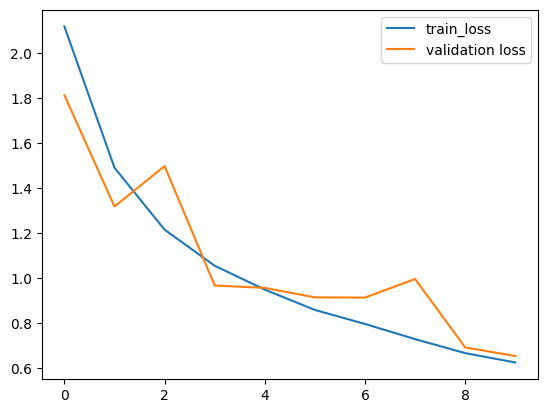

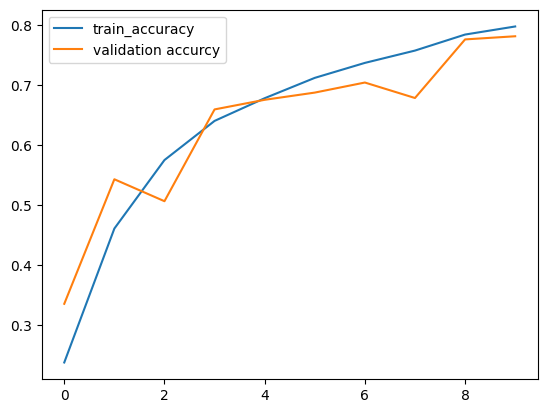

In [56]:
h=history

#plot the loss function vlues
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy vlues
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='validation accurcy')
plt.legend()
plt.show()


